In [1]:
import matplotlib.pyplot as plt
from scipy.io import wavfile
import argparse
import os
from glob import glob
import numpy as np
import pandas as pd
from librosa.core import resample, to_mono
from tqdm import tqdm
import wavio
from python_speech_features import mfcc, logfbank


In [2]:
def plot_signals(signals):
    fig, axes = plt.subplots(nrows=2,ncols=2, sharex=False, sharey=True, figsize=(20,5))
    fig.suptitle('Time series', size = 16)
    i =0 
    for x in range(2):
        for y in range(2):
            axes[x,y].set_title(list(signals.keys())[i])
            axes[x,y].plot(list(signals.values())[i])
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i += 1


def plot_fft(fft):
    fig, axes = plt.subplots(nrows=2,ncols=2, sharex=False, sharey=True, figsize=(20,5))
    fig.suptitle('Fourier transform', size = 16)
    i =0 
    for x in range(2):
        for y in range(2):
            data = list(fft.values())[i]
            Y, freq = data[0], data[1]
            axes[x,y].set_title(list(fft.keys())[i])
            axes[x,y].plot(freq, Y)
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i += 1



def plot_fbank(fbank):
    fig, axes = plt.subplots(nrows=2,ncols=2, sharex=False, sharey=True, figsize=(20,5))
    fig.suptitle('Filter bank coeficcient', size = 16)
    i =0 
    for x in range(2):
        for y in range(2):
            axes[x,y].set_title(list(fbank.keys())[i])
            axes[x,y].imshow(list(fbank.values())[i], cmap='hot', interpolation='nearest')
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i += 1


def plot_mfccs(mfccs):
    fig, axes = plt.subplots(nrows=2,ncols=2, sharex=False, sharey=True, figsize=(20,5))
    fig.suptitle('MFCC', size = 16)
    i =0 
    for x in range(2):
        for y in range(2):
            axes[x,y].set_title(list(mfccs.keys())[i])
            axes[x,y].imshow(list(mfccs.values())[i], cmap='hot', interpolation='nearest')
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i += 1


            

In [3]:
df = pd.read_csv('../Covid_19 Project/metadata.csv')
df.set_index('Merged', inplace=True)

In [4]:
for f in df.index:
    rate, signal = wavfile.read('../Covid_19 Project/Converted files/'+f)
    df.at[f, 'length'] = signal.shape[0]/rate

In [5]:
classes = list(np.unique(df.status))
class_dist = df.groupby(['status']) ['length'].mean()

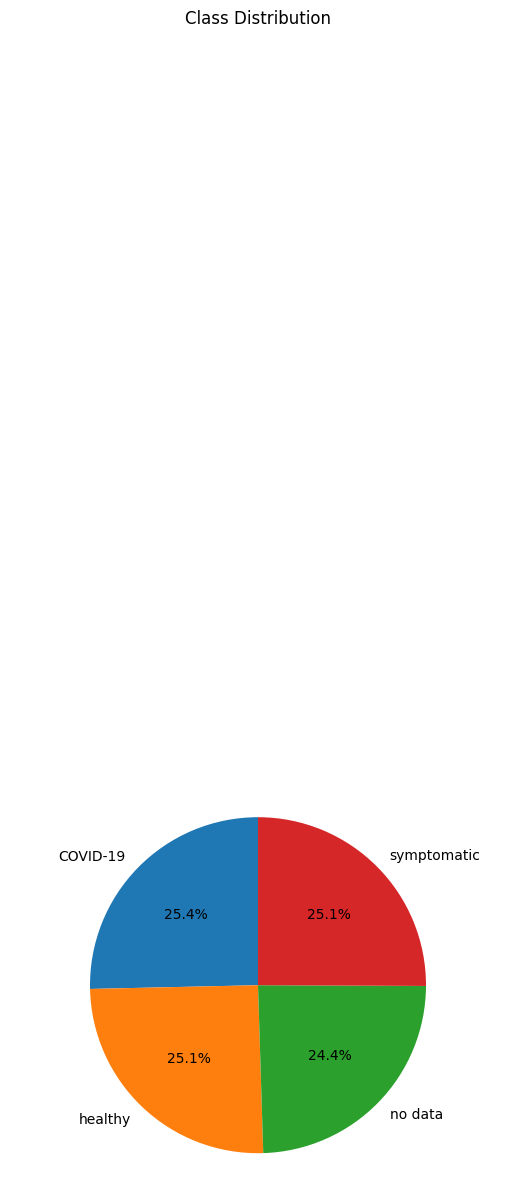

In [6]:
fig, ax = plt.subplots()
ax.set_title('Class Distribution', y= 3.08)
ax.pie(class_dist, labels=class_dist.index, autopct='%1.1f%%', shadow=False, startangle=90)
ax.axis('equal')
df.reset_index(inplace=True)

Plotting and Cleaning 


In [7]:
def calc_fft(y, rate):
    n= len(y)
    freq = np.fft.rfftfreq(n, d=1/rate)
    y = abs(np.fft.rfft(y)/n)
    return (y , freq)




In [10]:
def envelope(y, rate, threshold):
    mask=[]
    y = pd.Series(y).apply(np.abs)
    y_mean = y.rolling(window=int(rate/10), min_periods=1, center=True).mean()
    for mean in y_mean:
        if mean > threshold:
            mask.append(True)
        else:
            mask.append(False)
    return mask


In [11]:
import librosa

signals = {}
fft = {}
fbank = {}
mfccs = {}

for c in classes:
    wav_file = df[df.status==c].iloc[0,0]
    signal, rate = librosa.load('../Covid_19 Project/Converted files/'+wav_file, sr=44100
                                )
    
    mask = envelope(signal, rate, 0.005)
    signal = signal[mask]
    signals[c] = signal
    fft[c] = calc_fft(signal, rate) 

    bank = logfbank(signal[:rate], rate, nfilt=26, nfft=1103).T
    fbank[c] = bank


    mel = mfcc(signal[:rate], rate, numcep=13, nfilt=26, nfft=1103).T
    mfccs[c] = mel


    




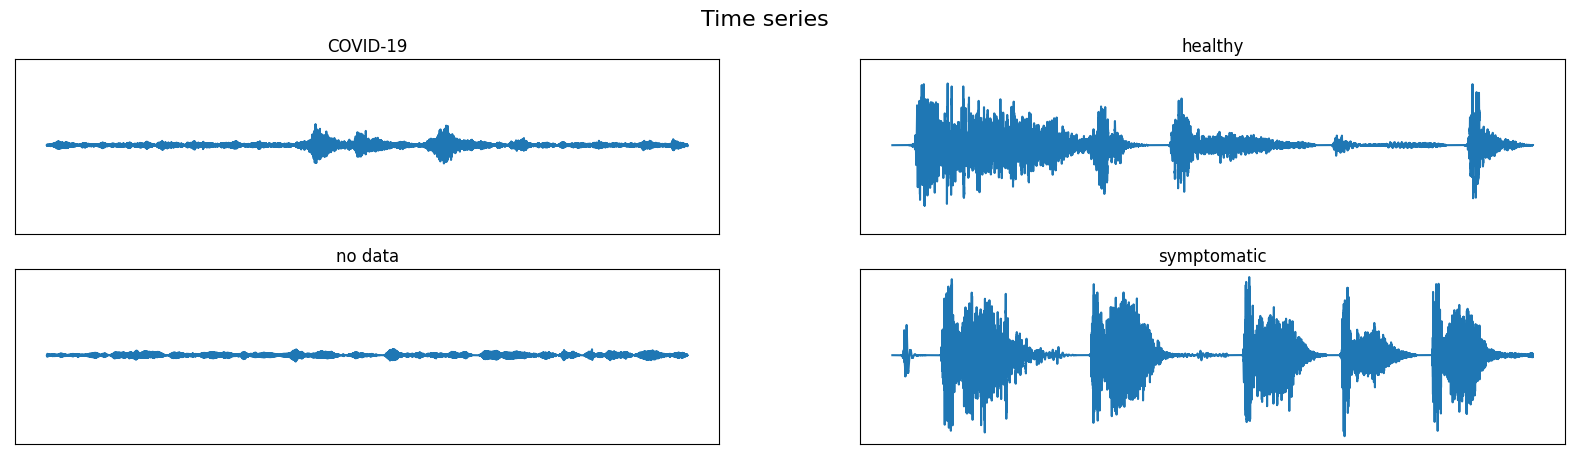

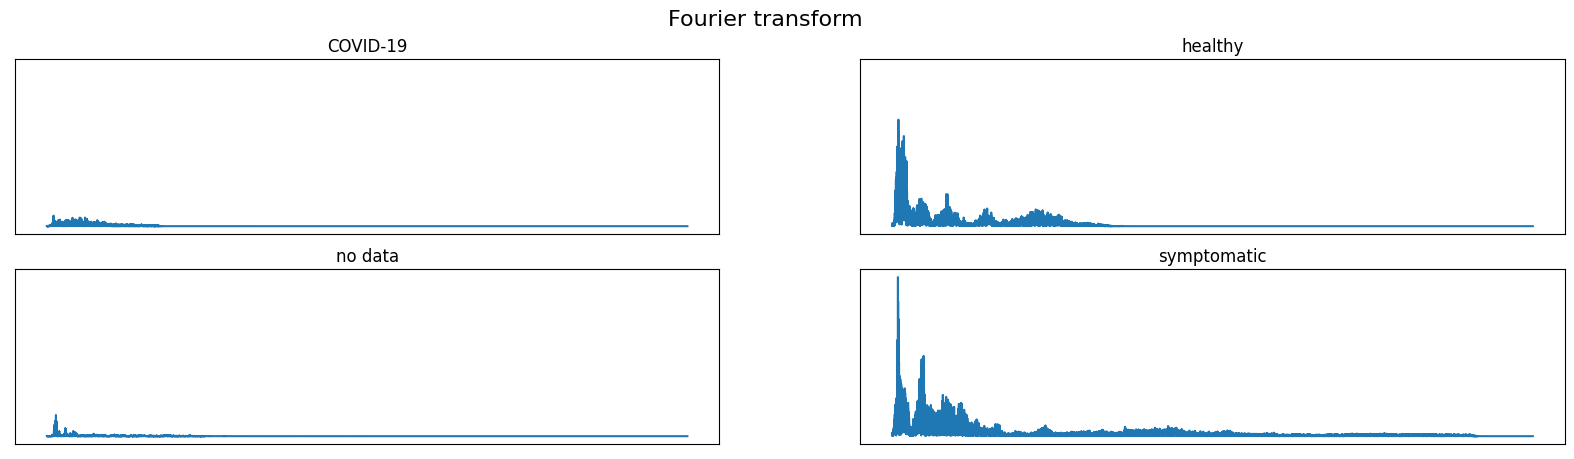

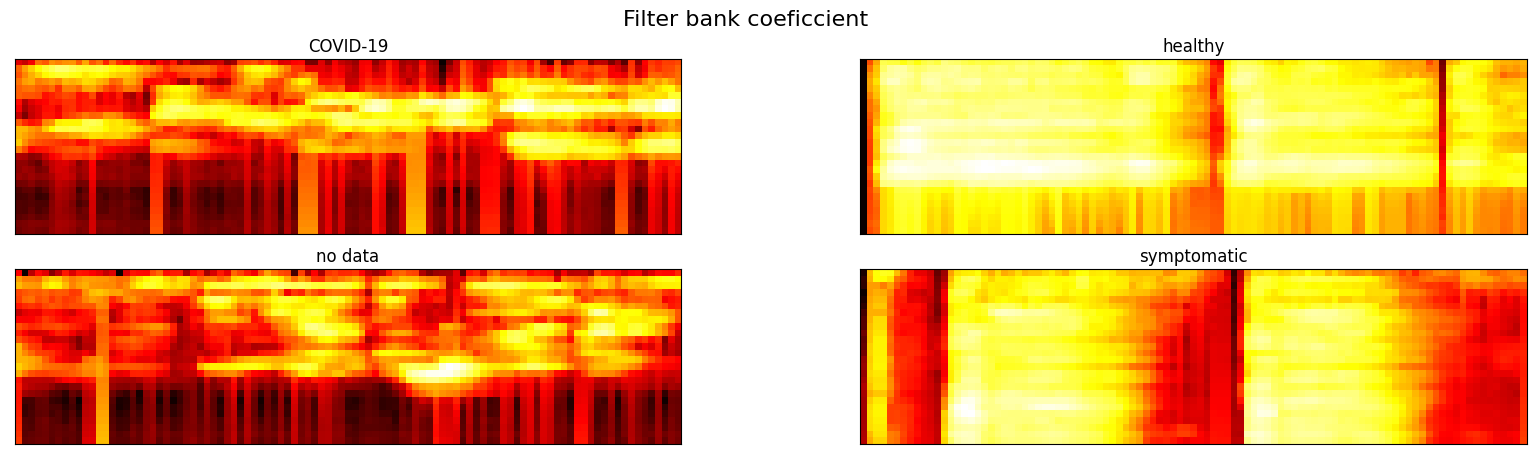

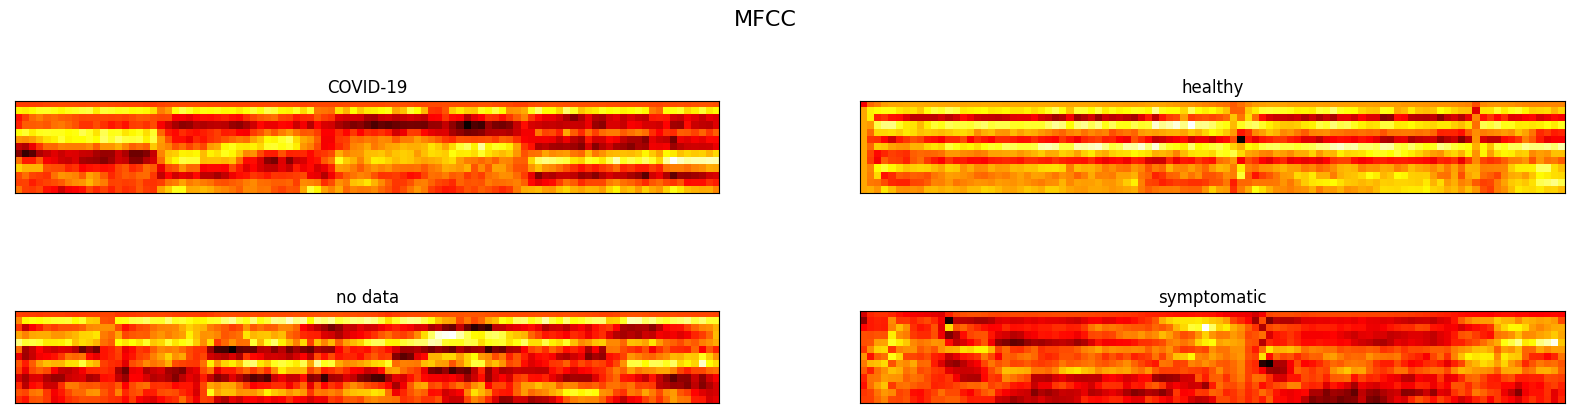

In [12]:
plot_signals(signals)
plt.show()

plot_fft(fft)
plt.show()

plot_fbank(fbank)
plt.show()

plot_mfccs(mfccs)
plt.show()

data cleaning 


In [13]:
if len(os.listdir('clean')) == 0:
    for f in tqdm (df.Merged):
        signal, rate = librosa.load('../Covid_19 Project/Converted files/'+wav_file, sr=16000)
        mask = envelope(signal, rate, 0.0005)
        wavfile.write(filename='../Covid_19 Project/clean/'+f, rate=rate, data=signal[mask])

  3%|▎         | 795/27550 [04:06<2:18:29,  3.22it/s]


KeyboardInterrupt: 